<a href="https://colab.research.google.com/github/PlasticxPlastic/project_linear_algreba/blob/main/the_beatles_recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [76]:
import warnings
warnings.filterwarnings('ignore')

Import Data

In [77]:
url = "https://raw.githubusercontent.com/PlasticxPlastic/project_linear_algreba/main/TheBeatlesCleaned.csv"
dataset = pd.read_csv(url)
dataset.head()

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.270,0.0665,0.971,173947
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.707,0.3090,0.882,108547
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.635,0.0601,0.835,177133
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.608,0.1290,0.929,145080
4,5,1963,Please Please Me,Boys,0.402,0.860,0.0504,0.607,0.7360,0.822,146440


find shape of dataset which is 193 rows nad 11 columns

In [78]:
dataset.shape

(193, 11)

Show data infomation

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            193 non-null    int64  
 1   year          193 non-null    int64  
 2   album         193 non-null    object 
 3   song          193 non-null    object 
 4   danceability  193 non-null    float64
 5   energy        193 non-null    float64
 6   speechiness   193 non-null    float64
 7   acousticness  193 non-null    float64
 8   liveness      193 non-null    float64
 9   valence       193 non-null    float64
 10  duration_ms   193 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 16.7+ KB


In [80]:
def cbname(dataset):
  dt = dataset.copy()
  for i in range(0,dataset.shape[0]):
    dt["cbname"] = dt["song"] +'     album : ' + dt["album"]
  return dt

In [81]:
data = cbname(dataset)

In [82]:
data.head()

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms,cbname
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.270,0.0665,0.971,173947,I Saw Her Standing There : Please Please Me
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.707,0.3090,0.882,108547,Misery : Please Please Me
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.635,0.0601,0.835,177133,Anna : Please Please Me
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.608,0.1290,0.929,145080,Chains : Please Please Me
4,5,1963,Please Please Me,Boys,0.402,0.860,0.0504,0.607,0.7360,0.822,146440,Boys : Please Please Me


In [83]:
data.drop(columns = ["id"])
data["ids"]=[i for i in range(0,data.shape[0])]

Count how many value in data

In [84]:
data.count()

id              193
year            193
album           193
song            193
danceability    193
energy          193
speechiness     193
acousticness    193
liveness        193
valence         193
duration_ms     193
cbname          193
ids             193
dtype: int64

In [85]:
data.song

0       I Saw Her Standing There
1                         Misery
2                           Anna
3                         Chains
4                           Boys
                 ...            
188            ive got a feeling
189                one after 909
190    the long and winding road
191                 for you blue
192                     get back
Name: song, Length: 193, dtype: object

Check if there is some of data is missing 

In [86]:
data.isnull().any() 

id              False
year            False
album           False
song            False
danceability    False
energy          False
speechiness     False
acousticness    False
liveness        False
valence         False
duration_ms     False
cbname          False
ids             False
dtype: bool

Danceability graph

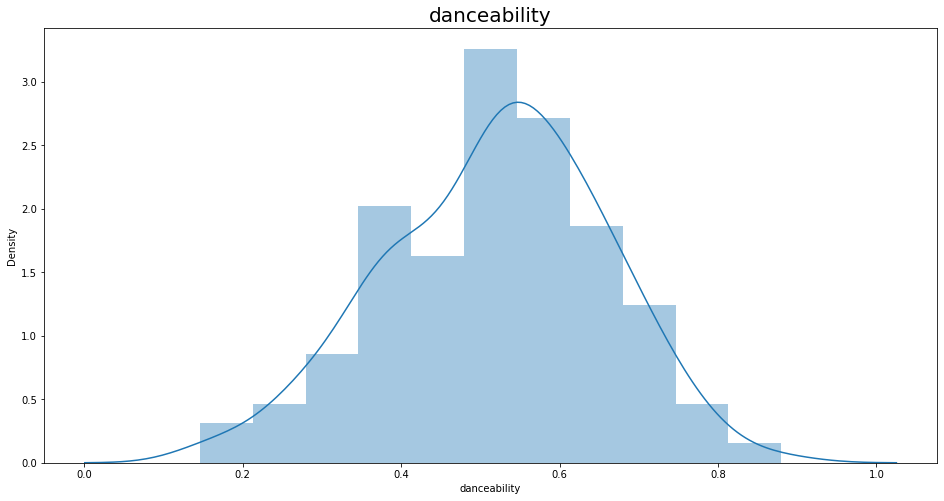

In [87]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('danceability',fontsize = 20)                                                                                                                     
sns.distplot(data['danceability'])                                                                                                                                   
plt.show()

energy graph

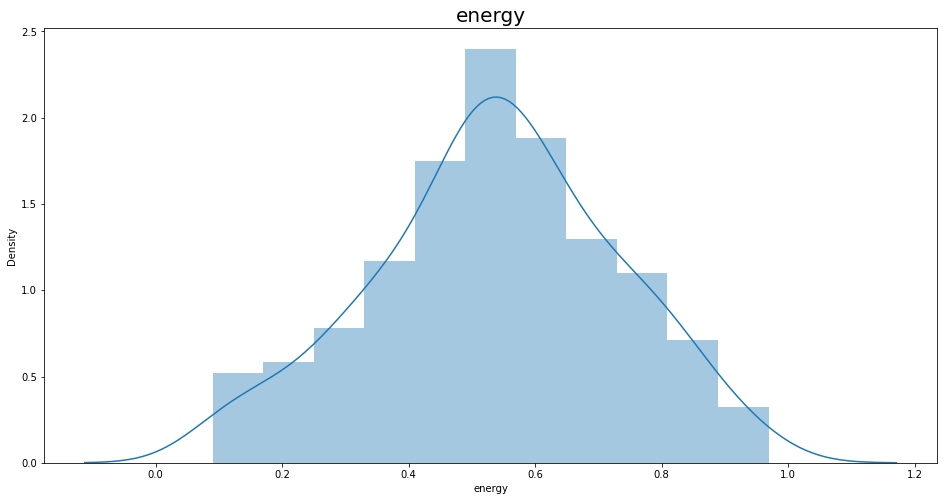

In [88]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('energy',fontsize = 20)                                                                                                                      
sns.distplot(data['energy'])                                                                                                                                      
plt.show()

speechiness graph

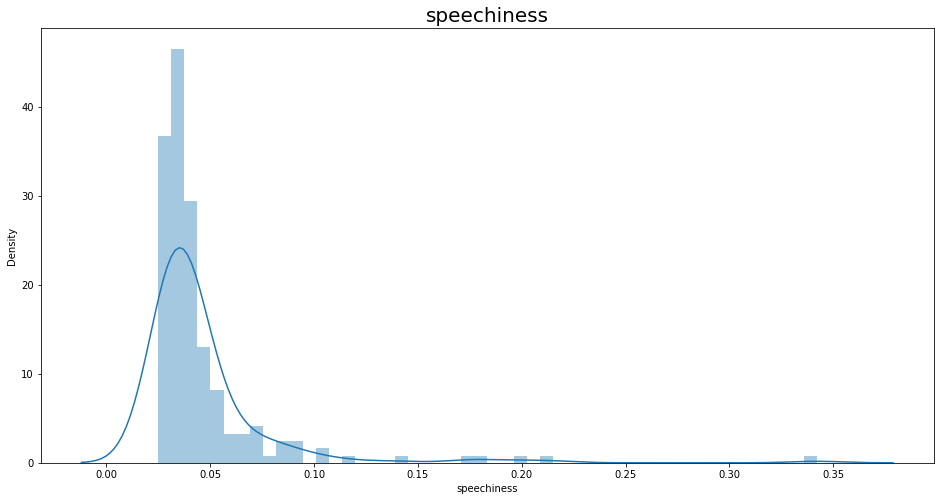

In [89]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('speechiness',fontsize = 20)                                                                                                                      
sns.distplot(data['speechiness'])                                                                                                                                      
plt.show()

acousticness graph

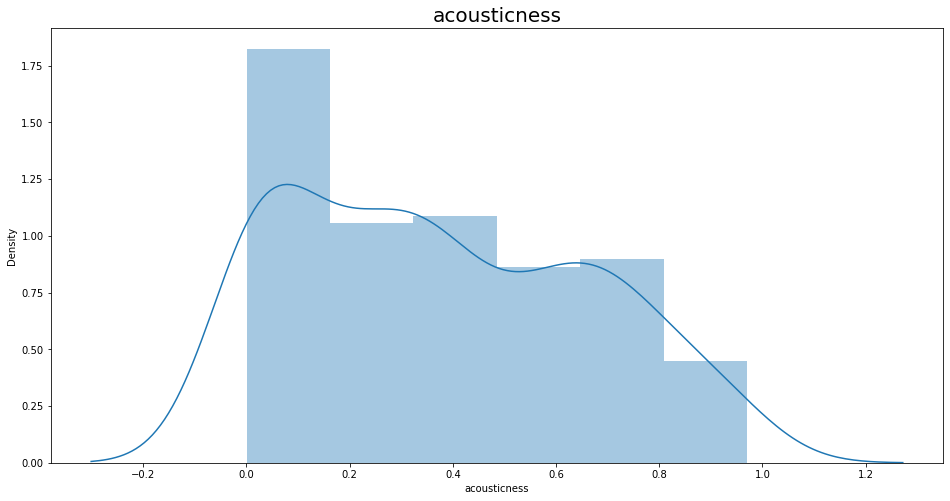

In [90]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('acousticness',fontsize = 20)                                                                                                                      
sns.distplot(data['acousticness'])                                                                                                                                      
plt.show()

liveness graph

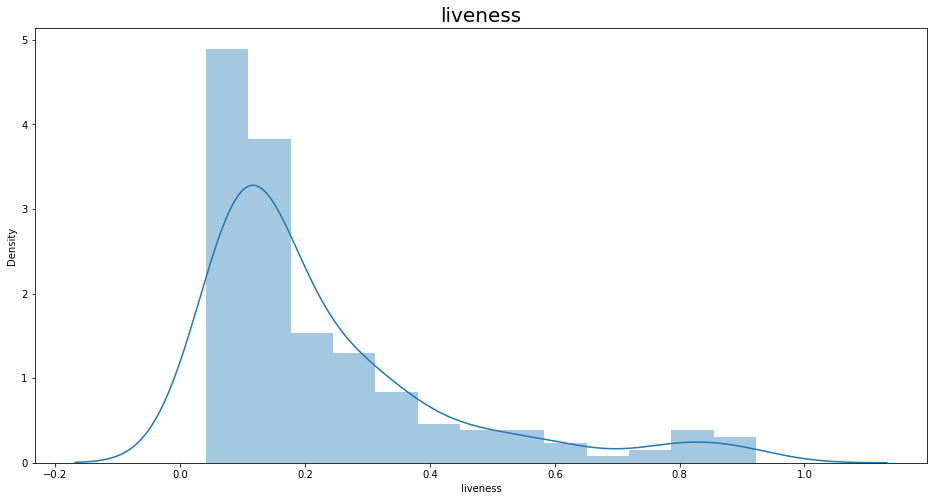

In [91]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('liveness',fontsize = 20)                                                                                                                      
sns.distplot(data['liveness'])                                                                                                                                      
plt.show()

valence graph

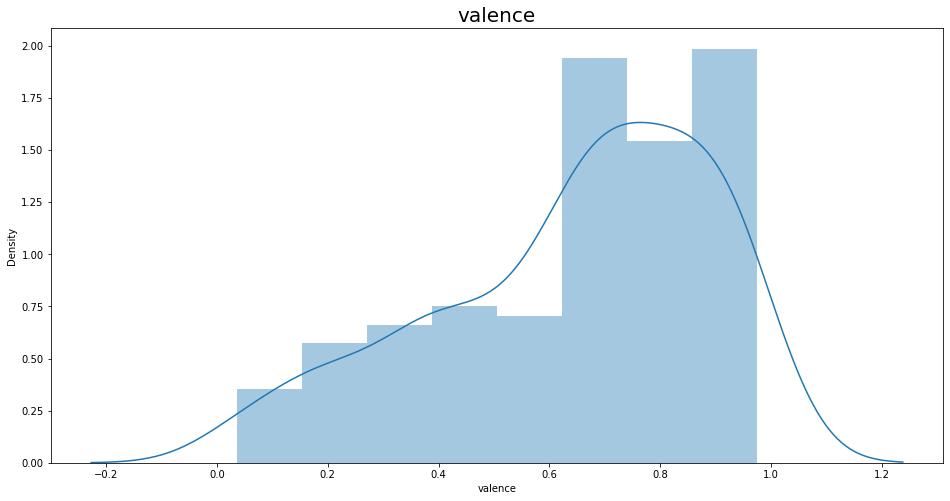

In [92]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('valence',fontsize = 20)                                                                                                                      
sns.distplot(data['valence'])                                                                                                                                      
plt.show()

Count value in column album

In [93]:
data["album"].value_counts()

The Beatles (white album)                30
Abbey Road                               17
Please Please Me                         14
With The Beatles                         14
Beatles for Sale                         14
Help!                                    14
Rubber Soul                              14
Revolver                                 14
A Hard Day's Night                       13
Sgt. Pepper's Lonely Hearts Club Band    13
Yellow Submarine                         13
Let It Be                                12
Magical Mystery Tour                     11
Name: album, dtype: int64

Drop column ID, year, album, song, duration_ms off

In [94]:
u = data.copy()
df = data.drop(columns=['id', 'year', 'album','song','duration_ms','ids','cbname'])


In [95]:
np.matrix(df)

matrix([[0.491, 0.801, 0.0361, ..., 0.971,
         'I Saw Her Standing There : Please Please Me', 0],
        [0.591, 0.605, 0.0413, ..., 0.882, 'Misery : Please Please Me',
         1],
        [0.608, 0.565, 0.0336, ..., 0.835, 'Anna : Please Please Me', 2],
        ...,
        [0.299, 0.329, 0.0279, ..., 0.392,
         'the long and winding road : Let It Be', 190],
        [0.88, 0.556, 0.0855, ..., 0.955, 'for you blue : Let It Be',
         191],
        [0.761, 0.592, 0.0586, ..., 0.332, 'get back : Let It Be', 192]],
       dtype=object)

plot graph relation of all column

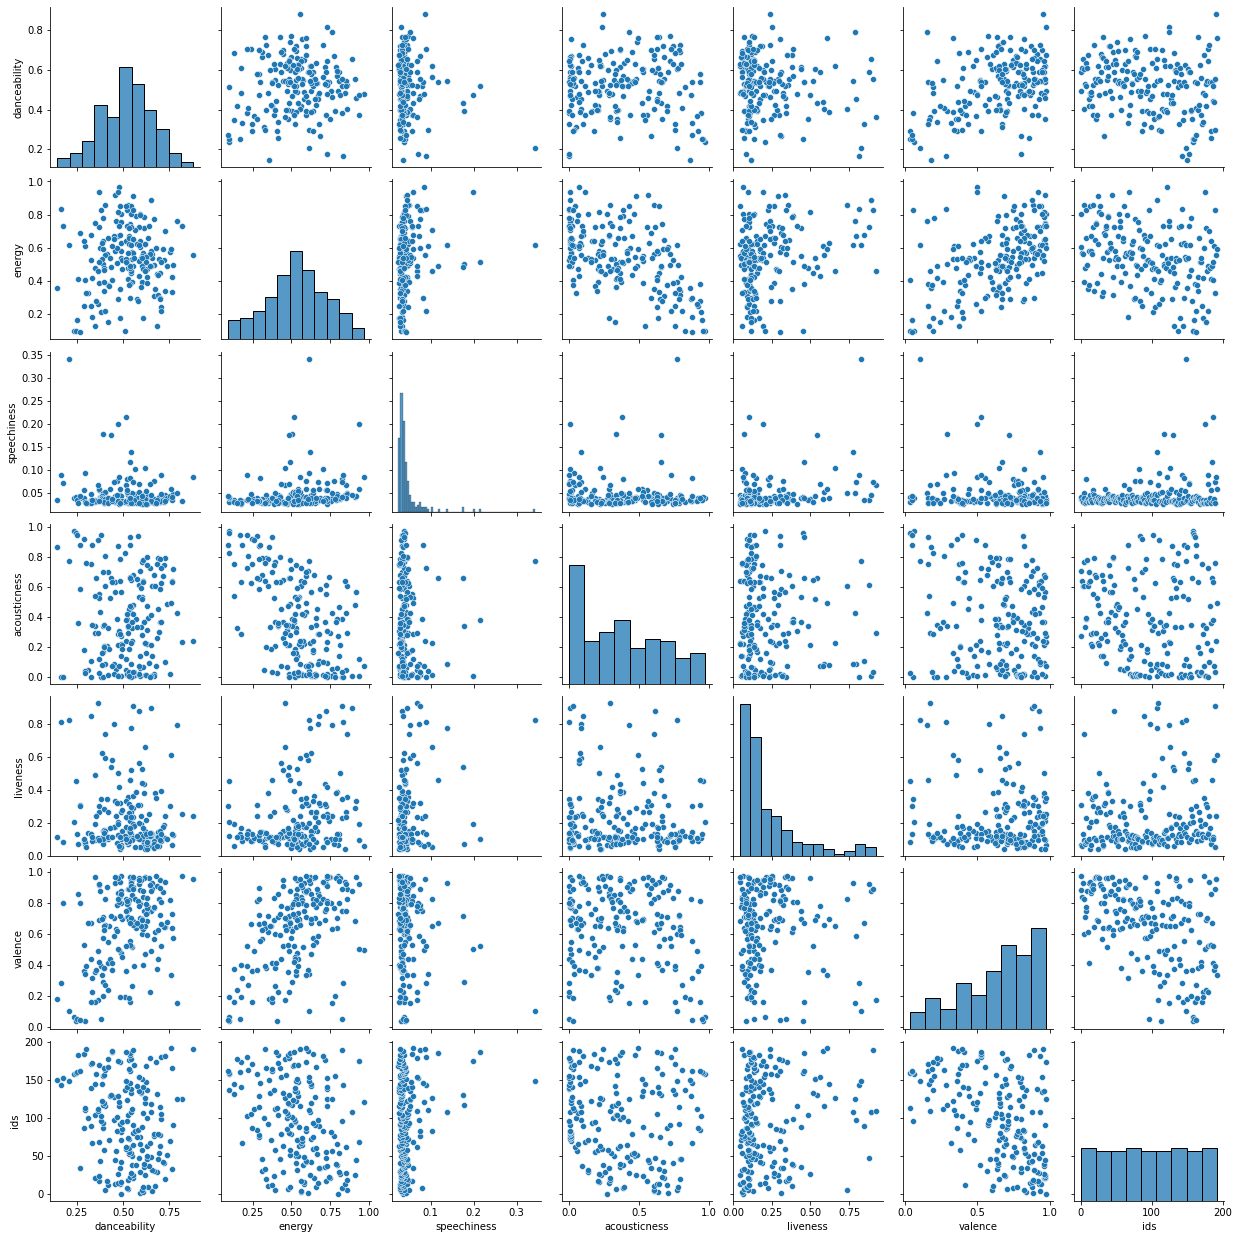

In [96]:
sns.pairplot(df)

build correlation graph

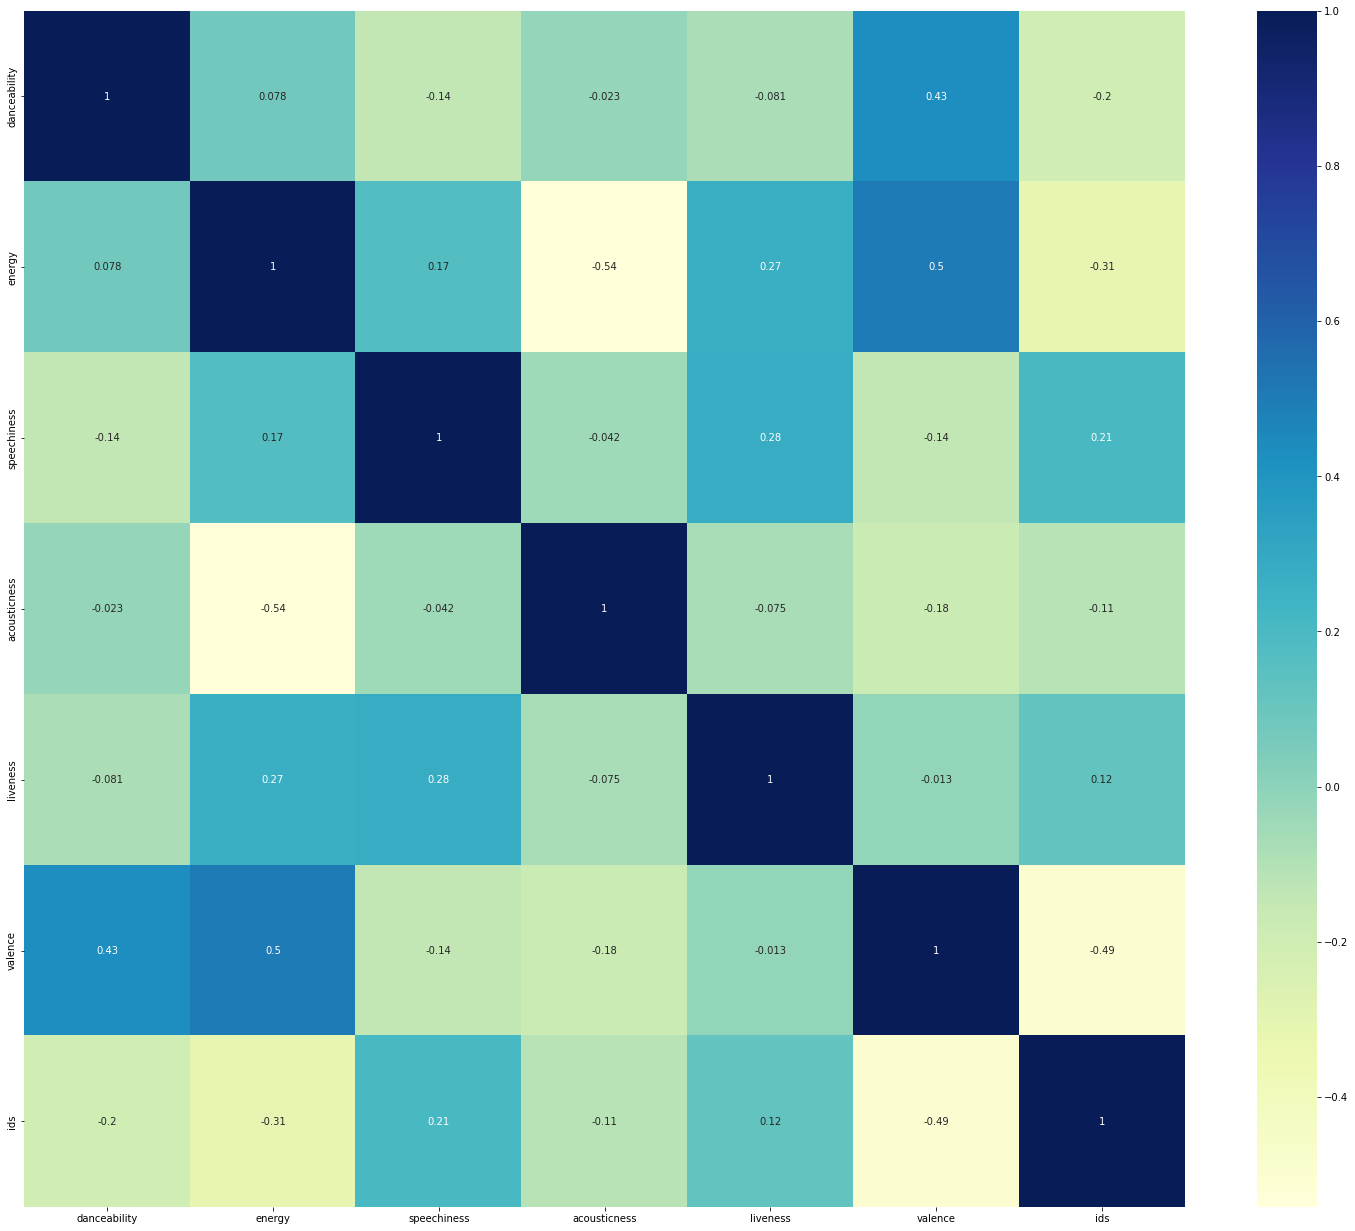

In [97]:
corr = df.corr()
indx = corr.index
plt.figure(figsize=(26,22))
sns.heatmap(df[indx].corr(),annot=True,cmap="YlGnBu")

หลังจากบรรทัดนี้ขอแก้ต่ออีกหน่อยอย่าพึ่งทำนะ

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
test_data = u.drop(columns=['id', 'year', 'album','song','duration_ms',])                  

In [99]:
test_data

,danceability,energy,speechiness,acousticness,liveness,valence,cbname,ids
0,0.491,0.801,0.0361,0.2700,0.0665,0.971,I Saw Her Standing There : Please Please Me,0
1,0.591,0.605,0.0413,0.7070,0.3090,0.882,Misery : Please Please Me,1
2,0.608,0.565,0.0336,0.6350,0.0601,0.835,Anna : Please Please Me,2
3,0.654,0.561,0.0304,0.6080,0.1290,0.929,Chains : Please Please Me,3
4,0.402,0.860,0.0504,0.6070,0.7360,0.822,Boys : Please Please Me,4
...,...,...,...,...,...,...,...,...
188,0.440,0.609,0.0358,0.0715,0.5820,0.364,ive got a feeling : Let It Be,188
189,0.554,0.828,0.0739,0.0307,0.9070,0.888,one after 909 : Let It Be,189
190,0.299,0.329,0.0279,0.7560,0.0559,0.392,the long and winding road : Let It Be,190
191,0.880,0.556,0.0855,0.2400,0.2400,0.955,for you blue : Let It Be,191


In [100]:
float(test_data['danceability'][0])

0.491

In [101]:
from numpy.linalg import norm

In [102]:
def recommend(dcblt, eng, sphn, acct, livn, val):
  test_array = np.array([dcblt, eng, sphn, acct, livn, val])
  score_lst = []
  for i in range(193):
    train_array = np.array([float(test_data['danceability'][i]),float(test_data['energy'][i]),
                           float(test_data['speechiness'][i]),float(test_data['acousticness'][i]),
                           float(test_data['liveness'][i]),float(test_data['valence'][i])])
    cosine = np.dot(test_array,train_array)/(norm(test_array)*norm(train_array))
    score_lst.append(cosine)
  return score_lst
  

In [116]:
def user_input():
  print("This is the beatle recommendation system we can recommend you the beatle song !!! ")
  print()
  print("we just need to know some information")
  print()
  print("1) How would you rate your taste with instrumental song (1 to 10 or 0 if you dont mind) : ")
  speechiness = int(input())
  if speechiness != 0:
    speechiness = float(speechiness / 10)
  else:
    speechiness = 0.5
  print("2) How would you rate your taste with danceable song (1 to 10 or 0 if you dont mind) : ")
  danceabilty = int(input())
  if danceabilty != 0:
    danceabilty = float(danceabilty / 10)
  else:
    danceabilty = 0.5
  print("3) How would you rate your taste with live record song (1 to 10 or 0 if you dont mind) : ")
  liveness = int(input())
  if liveness != 0:
    liveness = float(liveness / 10)
  else:
    liveness = 0.5
  print("4)How would you rate your taste with accoustic song (1 to 10 or 0 if you dont mind) : ")
  accousticness = int(input())
  if accousticness != 0:
    accousticness = float(accousticness / 10)
  else:
    accousticness = 0.5
  print("5)How would you rate your taste with positive song (1 to 10 or 0 if you dont mind) : ")
  valence = int(input())
  if valence != 0:
    valence = float(valence / 10)
  else:
    valence = 0.5
  print("5)How would you rate your taste with high energy song (1 to 10 or 0 if you don1t mind) : ")
  energy = int(input())
  if energy != 0:
    energy = float(energy / 10)
  else:
    energy = 0.5
  return speechiness,danceabilty,liveness,accousticness,valence,energy


This is the beatle recommendation system we can recommend you the beatle song !!! 

we just need to know some information

1) How would you rate your taste with instrumental song (1 to 10 or 0 if you dont mind) : 
5
2) How would you rate your taste with danceable song (1 to 10 or 0 if you dont mind) : 
2
3) How would you rate your taste with live record song (1 to 10 or 0 if you dont mind) : 
4
4)How would you rate your taste with accoustic song (1 to 10 or 0 if you dont mind) : 
10
5)How would you rate your taste with positive song (1 to 10 or 0 if you dont mind) : 
6
5)How would you rate your taste with high energy song (1 to 10 or 0 if you dont mind) : 
0


(0.5, 0.2, 0.4, 1.0, 0.6, 0.5)

In [117]:
y = user_input()
sphn, dcblt, livn, acct,val, eng = y
x = recommend(dcblt, eng, sphn, acct, livn, val)
y = max(x)
for i in range(len(x)):
  if x[i] == y:
    highest = i
data['cbname'][i]

This is the beatle recommendation system we can recommend you the beatle song !!! 

we just need to know some information

1) How would you rate your taste with instrumental song (1 to 10 or 0 if you dont mind) : 
10
2) How would you rate your taste with danceable song (1 to 10 or 0 if you dont mind) : 
10
3) How would you rate your taste with live record song (1 to 10 or 0 if you dont mind) : 
2
4)How would you rate your taste with accoustic song (1 to 10 or 0 if you dont mind) : 
4
5)How would you rate your taste with positive song (1 to 10 or 0 if you dont mind) : 
1
5)How would you rate your taste with high energy song (1 to 10 or 0 if you dont mind) : 
2


'get back : Let It Be'

-----------------------------------------